<a href="https://colab.research.google.com/github/vijayrgopu/ml-kaggle/blob/master/TitanicPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kaggle Competition: https://www.kaggle.com/c/titanic

My first program

In [0]:
!pip install missingno

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as ms
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
!wget https://www.dropbox.com/s/8grgwn4b6y25frw/titanic.csv -q

In [0]:
data = pd.read_csv('titanic.csv')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


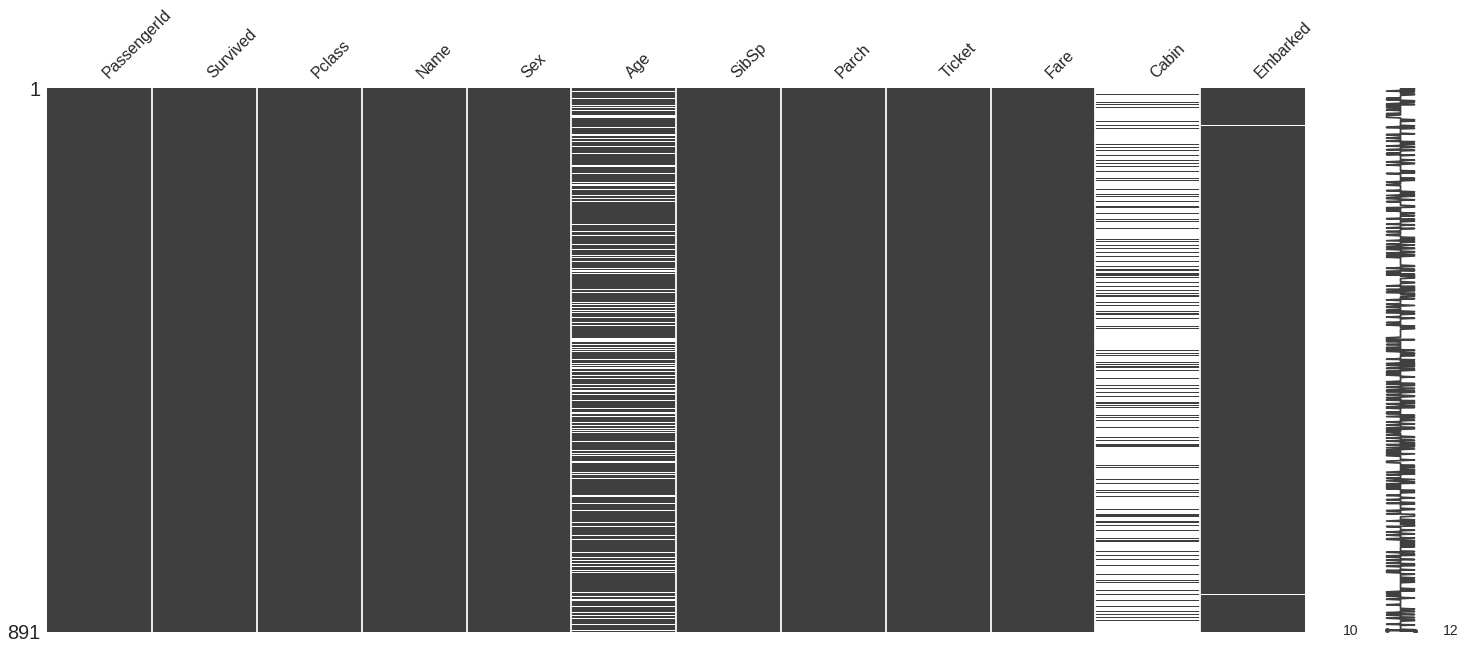

In [0]:
ms.matrix(data)

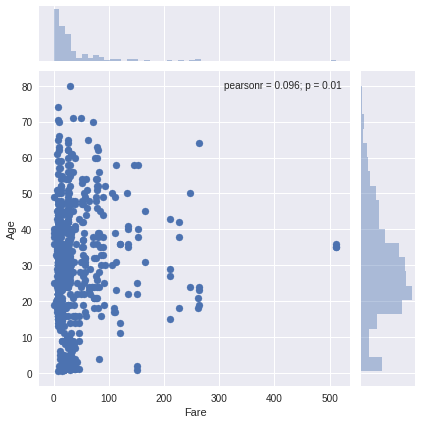

In [0]:
sns.jointplot(x='Fare',y='Age',data=data)

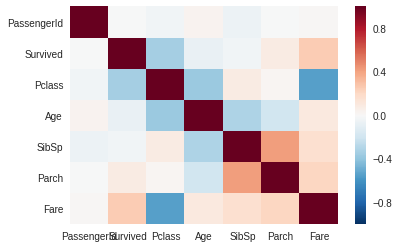

In [0]:
sns.heatmap(data.corr())

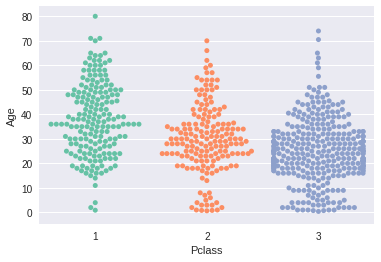

In [0]:
sns.swarmplot(x='Pclass',y='Age',data=data,palette='Set2')

In [0]:
sex = pd.get_dummies(data['Sex'],drop_first=True)

In [0]:
embarked = pd.get_dummies(data['Embarked'],drop_first=True)

In [0]:
data['Salutation'] = data['Name'].str.split(",",expand=True)[1].str.split(".",expand=True)[0].str.strip()
data['Royalty'] = pd.get_dummies((data['Salutation'] == 'Jonkheer') | (data['Salutation'] == 'Sir') | (data['Salutation'] == 'Lady') | (data['Salutation'] == 'the Countess') | ((data['Salutation'] == 'Dr') & (data['Pclass'] == 1)) | (data['Salutation'] == 'Sir'),drop_first=True)

In [0]:
data.drop(['Sex','Ticket','Cabin','Embarked','Salutation','Name'],axis=1,inplace=True)

In [0]:
data = pd.concat([data,sex,embarked],axis=1)

In [0]:
test = data[['Age','Pclass','male']]

test.pivot_table(values=['Age'],index=['male','Pclass'],aggfunc=np.mean)

Age
male Pclass           
0    1       34.611765
     2       28.722973
     3       21.750000
1    1       41.281386
     2       30.740707
     3       26.507589

In [0]:
data.head(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Royalty,male,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0


In [0]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  male = cols[2]
  
  if pd.isnull(Age):
    if male == 1 and Pclass == 1:
      return 41
    if male == 1 and Pclass == 2:
      return 31
    if male == 1 and Pclass == 3:
      return 27
    if male == 0 and Pclass == 1:
      return 35
    if male == 0 and Pclass == 2:
      return 29
    if male == 0 and Pclass == 3:
      return 22
  else:
    return Age

In [0]:
data['Age'] = data[['Age','Pclass','male']].apply(impute_age,axis=1)

In [0]:
#data.loc[data['Salutation'] == 'Dr'] #Query Data

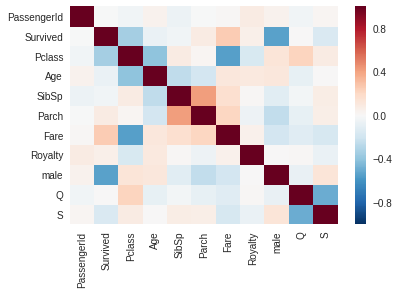

In [0]:
sns.heatmap(data.corr())

In [0]:
#ms.matrix(data)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived',axis=1),
                                                    data['Survived'],
                                                    test_size=0.35,random_state=42)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
logmodel.coef_

array([[ 4.76601960e-04, -6.49805328e-01, -1.95114527e-02,
        -2.54510553e-01, -1.05803511e-01,  5.18263606e-03,
         5.27025819e-02, -2.34595180e+00, -1.23008448e-01,
        -3.94824536e-01]])

In [0]:
logmodel.intercept_

array([3.06069426])

In [0]:
predict = logmodel.predict(X_test)

In [0]:
predict[:5]

array([0, 0, 0, 1, 1])

In [0]:
y_test[:5]

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
print(confusion_matrix(y_test,predict))

[[165  23]
 [ 38  86]]


In [0]:
from sklearn.metrics import precision_score

In [0]:
print(precision_score(y_test,predict))

0.7889908256880734


In [0]:
from sklearn.metrics import recall_score

In [0]:
print(recall_score(y_test,predict))

0.6935483870967742


In [0]:
from sklearn.metrics import f1_score

In [0]:
print(f1_score(y_test,predict))

0.738197424892704


In [0]:
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.81      0.88      0.84       188
          1       0.79      0.69      0.74       124

avg / total       0.80      0.80      0.80       312



In [0]:
!wget https://www.dropbox.com/s/6hyaidkuyfsv45u/production.csv -q
prod_data=pd.read_csv('production.csv')

In [0]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


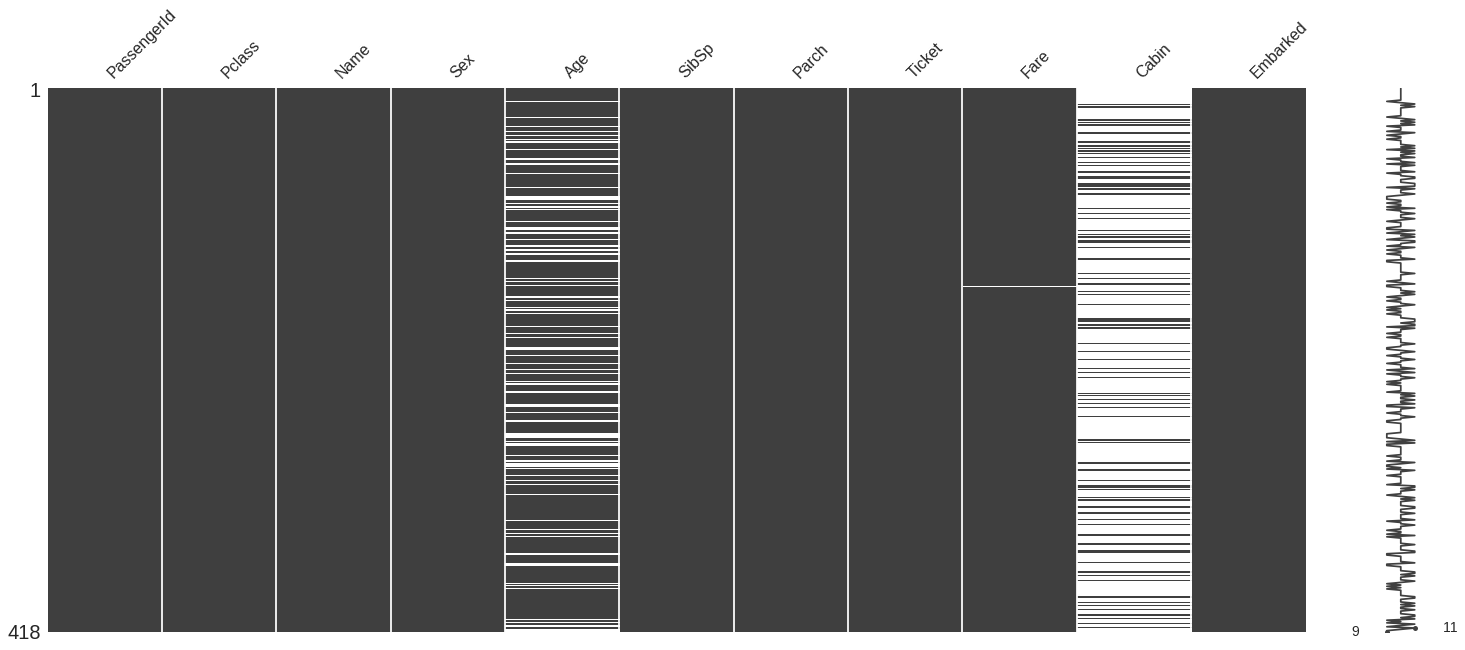

In [0]:
ms.matrix(prod_data)

In [0]:
prod_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
prod_sex = pd.get_dummies(prod_data['Sex'],drop_first=True)

In [0]:
prod_sex

In [0]:
prod_embarked = pd.get_dummies(prod_data['Embarked'],drop_first=True)

In [0]:
prod_embarked

In [0]:
test_prod_avg_age = prod_data[['Age','Sex','Pclass']]


In [0]:
test_prod_avg_age.pivot_table(values='Age',index=['Sex','Pclass'],aggfunc=np.mean)

Age
Sex    Pclass           
female 1       41.333333
       2       24.376552
       3       23.073400
male   1       40.520000
       2       30.940678
       3       24.525104

In [0]:
def impute_prod_age(cols):
  Age = cols[0]
  Sex = cols[1]
  Pclass = cols[2]
  
  if pd.isnull(Age):
    if Sex == 'male' and Pclass == 1:
      return 41
    if Sex == 'male' and Pclass == 2:
      return 31
    if Sex == 'male' and Pclass == 3:
      return 25
    if Sex == 'female' and Pclass == 1:
      return 41
    if Sex == 'female' and Pclass == 2:
      return 24
    if Sex == 'female' and Pclass == 3:
      return 23
  else:
    return Age

In [0]:
prod_data['Age'] = prod_data[['Age','Sex','Pclass']].apply(impute_prod_age,axis=1)

In [0]:
prod_data = pd.concat([prod_data,prod_sex,prod_embarked],axis=1)

In [0]:
prod_data['Salutation'] = prod_data['Name'].str.split(",",expand=True)[1].str.split(".",expand=True)[0].str.strip()
#prod_data['Salutation'].value_counts()
prod_data['Royalty'] = pd.get_dummies((prod_data['Salutation'] == 'Jonkheer') | (prod_data['Salutation'] == 'Sir') | (prod_data['Salutation'] == 'Lady') | (prod_data['Salutation'] == 'the Countess') | ((prod_data['Salutation'] == 'Dr') & (prod_data['Pclass'] == 1)) | (prod_data['Salutation'] == 'Sir'),drop_first=True)

In [0]:
prod_data['Salutation'].value_counts()

In [0]:
prod_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,Salutation,Royalty
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,0,Mr,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,Mrs,0


In [0]:
prod_data.drop(['Name','Sex','Ticket','Cabin','Embarked','Salutation'],axis=1,inplace=True)

In [0]:
prod_data.loc[prod_data['Fare'].isnull() == True]

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Royalty


In [0]:
prod_data.pivot_table(index=['Pclass'],values=['Fare'],aggfunc=np.mean)

,Fare
Pclass,
1,94.280297
2,22.202104
3,12.459678


In [0]:
def impute_prod_data_fare(cols):
  Fare = cols[0]
  Pclass = cols[1]
  if pd.isnull(Fare):
    if Pclass == 1:
      return 94
    if Pclass == 2:
      return 22
    if Pclass == 3:
      return 12
  else:
    return Fare

In [0]:
prod_data['Fare'] = prod_data[['Fare','Pclass']].apply(impute_prod_data_fare,axis=1)

In [0]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
Royalty        418 non-null uint8
dtypes: float64(2), int64(4), uint8(4)
memory usage: 21.3 KB


In [0]:
predict_output = logmodel.predict(prod_data)

In [0]:
predict_output

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [0]:
df1 = pd.DataFrame(predict_output,columns=['Survived'])

In [0]:
df2 = pd.DataFrame(prod_data,columns=['PassengerId'])

In [0]:
result = pd.concat([df2,df1],axis=1)

In [0]:
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,1


In [0]:
result.to_csv('result.csv',index=False)
from google.colab import files
files.download('result.csv')